# SQL in Python - Connecting to and retrieving data from PostgreSQL

Previously, you have learned how to connect to a SQL database by using a SQL client such as DBeaver. Apart from connecting to databases, DBeaver also allows you to run SQL queries against the database, create new tables and populate them with data as well as retrieving the data.

Python also allows executing SQL queries and getting the result into a Python object, for example a Pandas data frame. Instead of exporting a .csv file from DBeaver you can directly get the data you need into Python and continue your work. In addition we can reduce the steps by connecting to the database from Python directly, eliminating the need for a separate SQL client.

After you have the data in Python in the required shape you can export the data into a .csv file. This file is for your own reference, please avoid sending .csv files around - database is the point of reference when it comes to data. 

Having a copy of a .csv file (or another format) can speed up your analysis work. Imagine that the query takes 25 minutes to run. If you made some mistakes in your Python code you might need to go back to the original dataset. Instead of having to rerun the SQL query and having to wait you can read in the .csv file you have previously saved on your hard disk into Python and continue with your analysis work. 

**In this notebook you will see 2 ways to connect to SQL-Databases and export the data to a CSV file**


## Creating a connection to a PostgreSQL database with Python

There are 2 python packages that are the "go-to" when it comes to connecting to SQL-Databases: `psycopg2` and `sqlalchemy` 

### Connecting via psycopg2

In [1]:
import pandas as pd
import psycopg2


In order to create a connection to our PostgreSQL database we need the following information:

- host = the address of the machine the database is hosted on
- port = the virtual gate number through which communication will be allowed
- database = the name of the database
- user = the name of the user
- password = the password of the user

Because we don't want that the database information is published on github we put it into a `.env` file which is added into the `.gitignore`. 
In these kind of files you can store information that is not supposed to be published.
With the `dotenv` package you can read the `.env` files and get the variables.
(We will share the file with you on Slack!)


In [2]:
import os
from dotenv import load_dotenv

load_dotenv()

DATABASE = os.getenv('DATABASE')
USER_DB = os.getenv('USER_DB')
PASSWORD = os.getenv('PASSWORD')
HOST = os.getenv('HOST')
PORT = os.getenv('PORT')

The function from the psycopg2 package to create a connection is called `connect()`.
`connect()` expects the parameters listed above as input in order to connect to the database.

In [3]:
# Create connection object conn
conn = psycopg2.connect(
    database=DATABASE,
    user=USER_DB,
    password=PASSWORD,
    host=HOST,
    port=PORT
)

### Retrieving data from the database with psycopg2

Before we can use our connection to get data, we have to create a cursor. A cursor allows Python code to execute PostgreSQL commmands in a database session.
A cursor has to be created with the `cursor()` method of our connection object conn.

In [4]:
cur = conn.cursor()

Now we can run SQL-Queries with `cur.execute('QUERY')` and then run `cur.fetchall()` to get the data:

In [ ]:
cur.execute('SELECT * FROM eda.king_county_house_sales')
cur.fetchall()

But we want to work with the data. The easiest way is to import the data into pandas dataframes. We can use `pd.read_sql_query` or `pd.read_sql_table` or for convenience `pd.read_sql`.

This function is a convenience wrapper around read_sql_table and read_sql_query (for backward compatibility). It will delegate to the specific function depending on the provided input. A SQL query will be routed to read_sql_query , while a database table name will be routed to read_sql_table . Note that the delegated function might have more specific notes about their functionality not listed here.

In [6]:
# Open connection again because we closed it
#conn = psycopg2.connect(
#    database=DATABASE,
#    user=USER_DB,
#    password=PASSWORD,
#    host=HOST,
#    port=PORT
#)

In [5]:
# import the house details data into a pandas dataframe
query_string = "SELECT * FROM eda.king_county_house_details"
df_details = pd.read_sql(query_string, conn)

/var/folders/3r/65cz0ncj42375zk6tyvqgzk00000gn/T/ipykernel_30373/2695504167.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_details = pd.read_sql(query_string, conn)


In [6]:
# import the house sales data into a pandas dataframe
query_string = "SELECT * FROM eda.king_county_house_sales"
df_sales = pd.read_sql(query_string, conn)

/var/folders/3r/65cz0ncj42375zk6tyvqgzk00000gn/T/ipykernel_30373/505864475.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_sales = pd.read_sql(query_string, conn)


In [7]:
#close the connection
conn.close()

In [8]:
print(df_details.head())
print(df_sales.head())

           id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0     1000102       6.0        3.0       2400.0    9373.0     2.0         NaN   
1   100100050       3.0        1.0       1320.0   11090.0     1.0         0.0   
2  1001200035       3.0        1.0       1350.0    7973.0     1.5         NaN   
3  1001200050       4.0        1.5       1260.0    7248.0     1.5         NaN   
4  1003000175       3.0        1.0        980.0    7606.0     1.0         0.0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0   0.0          3      7      2400.0            0.0      1991           0.0   
1   0.0          3      7      1320.0            0.0      1955           0.0   
2   0.0          3      7      1350.0            0.0      1954           0.0   
3   0.0          5      7      1260.0            0.0      1955           NaN   
4   0.0          3      7       980.0            0.0      1954           0.0   

   zipcode      lat     long  sq

In [12]:
df_details.shape
#df_sales.shape

(21420, 19)

In [15]:
#export the data to a csv-file
df_details.to_csv('data/eda_details.csv',index=False)
df_sales.to_csv('data/eda_sales.csv',index=False)

### Connecting and retrieving data via SQLAlchemy

`sqlalchemy` works similarly. Here you have to create an engine with the database sting (a link that includes every information we entered in the conn object)

In [11]:
#from sqlalchemy import create_engine

#read the database string from the .env
#load_dotenv()

#DB_STRING = os.getenv('DB_STRING')

#db = create_engine(DB_STRING)

And then you can import that engine with a query into a pandas dataframe.

In [12]:
#import the data to a pandas dataframe
#query_string = "SELECT * FROM eda.king_county_house_sales"
#df_sqlalchemy = pd.read_sql(query_string, db)

In [ ]:
#df_sqlalchemy.head()

Because we don't want to run the queries over and over again we can export the data into a .csv file in order to use it in other notebooks as well. 

In [ ]:
#export the data to a csv-file
#df_sqlalchemy.to_csv('eda.csv',index=False)

In [18]:
#import the data from a csv-file
#df_import = pd.read_csv('data/eda.csv')

### Joining the Tables

The next step is to ensure that column names for both tables are different from each other. After confirming, we can now join the 2 tables.

In [55]:
#renaming the column name 'id' that is common in both tables
df_details.rename(columns={'id': 'details_id'}, inplace=True)
df_sales.rename(columns={'id': 'sales_id', 'date': 'sale_date'}, inplace=True)

In [56]:
#using pandas to merge the House Details and House Sales tables
df_joined = pd.merge(df_details, df_sales, left_on='details_id', right_on='house_id', how='left')
df_joined.head()

,details_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sale_date,price,house_id,sales_id
0,1000102,6.000,3.000,2400.000,9373.000,2.000,NaN,0.000,3,7,...,0.000,98002,47.326,-122.214,2060.000,7316.000,2014-09-16,280000.000,1000102,2495
1,1000102,6.000,3.000,2400.000,9373.000,2.000,NaN,0.000,3,7,...,0.000,98002,47.326,-122.214,2060.000,7316.000,2015-04-22,300000.000,1000102,2496
2,100100050,3.000,1.000,1320.000,11090.000,1.000,0.000,0.000,3,7,...,0.000,98155,47.775,-122.304,1320.000,8319.000,2014-11-12,275000.000,100100050,7320
3,1001200035,3.000,1.000,1350.000,7973.000,1.500,NaN,0.000,3,7,...,0.000,98188,47.432,-122.292,1310.000,7491.000,2015-03-06,272450.000,1001200035,13278
4,1001200050,4.000,1.500,1260.000,7248.000,1.500,NaN,0.000,5,7,...,NaN,98188,47.433,-122.292,1300.000,7732.000,2014-09-23,259000.000,1001200050,15529


Preparation of data with required columns for doing analysis

In [58]:
eda_data = df_joined[[*df_details.columns, 'sale_date', 'price']]
eda_data.to_csv('data/eda_data.csv', index=False)
eda_data.head()

,details_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sale_date,price
0,1000102,6.000,3.000,2400.000,9373.000,2.000,NaN,0.000,3,7,...,0.000,1991,0.000,98002,47.326,-122.214,2060.000,7316.000,2014-09-16,280000.000
1,1000102,6.000,3.000,2400.000,9373.000,2.000,NaN,0.000,3,7,...,0.000,1991,0.000,98002,47.326,-122.214,2060.000,7316.000,2015-04-22,300000.000
2,100100050,3.000,1.000,1320.000,11090.000,1.000,0.000,0.000,3,7,...,0.000,1955,0.000,98155,47.775,-122.304,1320.000,8319.000,2014-11-12,275000.000
3,1001200035,3.000,1.000,1350.000,7973.000,1.500,NaN,0.000,3,7,...,0.000,1954,0.000,98188,47.432,-122.292,1310.000,7491.000,2015-03-06,272450.000
4,1001200050,4.000,1.500,1260.000,7248.000,1.500,NaN,0.000,5,7,...,0.000,1955,NaN,98188,47.433,-122.292,1300.000,7732.000,2014-09-23,259000.000


### Visualize current dataset

Check how the data looks like.

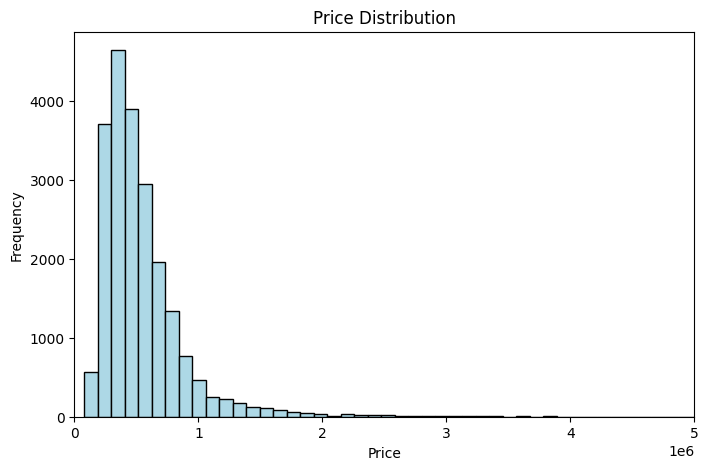

In [59]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

plt.hist(eda_data['price'], bins=70, color='lightblue', edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.xlim(0, 5000000)
plt.show()

#### EDA - 1: Fixing Column Names & Formats

We start with checking and fixing column names & formats

In [60]:
eda_data.columns

Index(['details_id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'sale_date', 'price'],
      dtype='object')

The column naming and formatting convention looks correct.

#### EDA - 2: Checking Duplicates

In [61]:
eda_data.duplicated().value_counts()

False    21597
Name: count, dtype: int64

The dataset seem to have all unique values only. 

#### EDA - 3: Data Types & Transforming Data

In [65]:
eda_data.dtypes

details_id                int64
bedrooms                float64
bathrooms               float64
sqft_living             float64
sqft_lot                float64
floors                  float64
waterfront              float64
view                    float64
condition                 int64
grade                     int64
sqft_above              float64
sqft_basement           float64
yr_built                  int64
yr_renovated            float64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15           float64
sqft_lot15              float64
sale_date        datetime64[ns]
price                   float64
dtype: object

In [64]:
#changing sale_date to 
type(eda_data['sale_date'])
eda_data['sale_date'] = pd.to_datetime(eda_data['sale_date'])

In [66]:
#print(eda_data.head())
#print(eda_data.tail())
#print(eda_data.info())
print(eda_data.describe())

          details_id  bedrooms  bathrooms  sqft_living    sqft_lot    floors  \
count      21597.000 21597.000  21597.000    21597.000   21597.000 21597.000   
mean  4580474287.771     3.373      2.116     2080.322   15099.409     1.494   
min      1000102.000     1.000      0.500      370.000     520.000     1.000   
25%   2123049175.000     3.000      1.750     1430.000    5040.000     1.000   
50%   3904930410.000     3.000      2.250     1910.000    7618.000     1.500   
75%   7308900490.000     4.000      2.500     2550.000   10685.000     2.000   
max   9900000190.000    33.000      8.000    13540.000 1651359.000     3.500   
std   2876735715.748     0.926      0.769      918.106   41412.637     0.540   

       waterfront      view  condition     grade  ...  sqft_basement  \
count   19206.000 21534.000  21597.000 21597.000  ...      21145.000   
mean        0.008     0.234      3.410     7.658  ...        291.857   
min         0.000     0.000      1.000     3.000  ...          

#### EDA - 4: Checking for Missing Values

details_id          0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2391
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     452
yr_built            0
yr_renovated     3848
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
date                0
price               0
dtype: int64

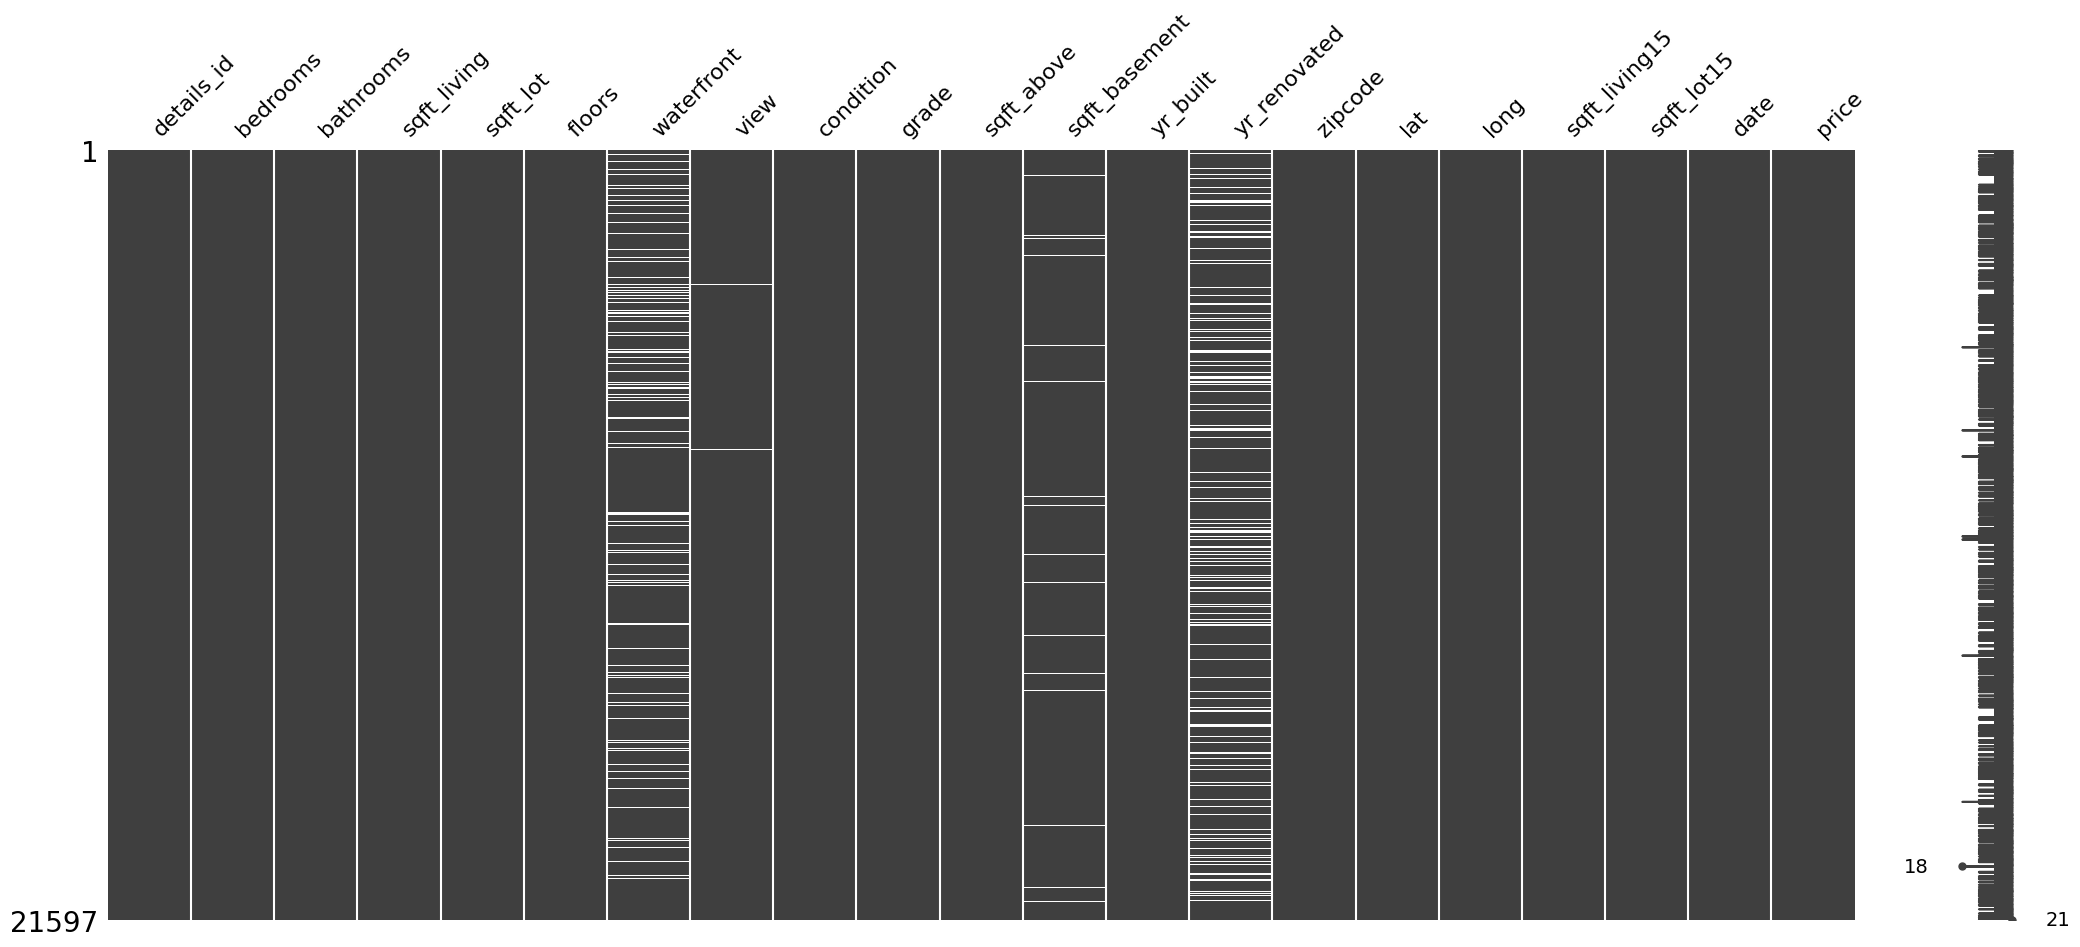

In [50]:
import missingno as msno
msno.matrix(eda_data)
eda_data.isna().sum()